In [1]:
from split_main import *

In [2]:
#RUN FUNCTION IF NOT split
split_to_2(0.8,0.2)
#split_to_3()

deleted folders
deleted folders
Total images:  220
Training:  176
Testing:  44
Total images:  152
Training:  121
Testing:  31


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2025-04-02 13:58:07.937078: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-02 13:58:08.406419: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-02 13:58:08.409983: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-02 13:58:10.127444: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
#Some Basic Imports
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For arrays
import pandas as pd             # For data

#Directories for train and test
train_path = '/home/olzhas_ubuntu/Desktop/combined/train'
test_path = '/home/olzhas_ubuntu/Desktop/combined/test'


#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16
#The dimension of the images we are going to define is 500x500
img_height = 500
img_width = 500

In [5]:
#img_height,img_width=224, 224
#batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.125,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 921 files belonging to 2 classes.
Using 806 files for training.


2025-04-02 13:58:12.920392: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.125,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 921 files belonging to 2 classes.
Using 115 files for validation.


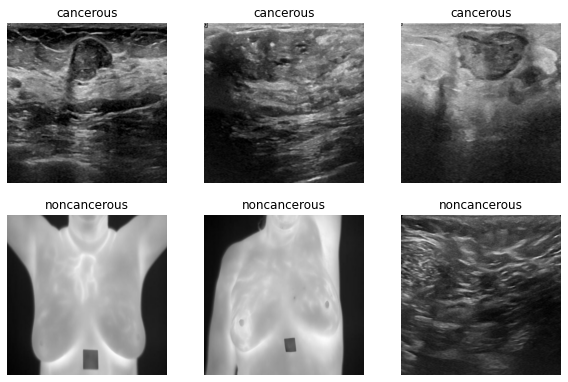

In [7]:
import matplotlib.pyplot as plt
class_names=train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
cnn_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(
                   include_top=False,
                   input_shape=(img_height,img_width,3),
                   pooling='max',
                   classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

In [9]:
cnn_model.add(pretrained_model)
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

In [10]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [early, learning_rate_reduction]

In [12]:
#history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=25)

In [13]:
history = cnn_model.fit(train_ds, validation_data=val_ds, epochs=25, callbacks=callbacks_list)

Epoch 1/25
51/51 [==============================] - 209s 4s/step - loss: 8.6020 - accuracy: 0.6514 - val_loss: 1.0069 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 2/25
51/51 [==============================] - 219s 4s/step - loss: 0.9017 - accuracy: 0.7469 - val_loss: 0.4866 - val_accuracy: 0.7565 - lr: 0.0010
Epoch 3/25
51/51 [==============================] - 213s 4s/step - loss: 0.4245 - accuracy: 0.8052 - val_loss: 0.3848 - val_accuracy: 0.8087 - lr: 0.0010
Epoch 4/25
51/51 [==============================] - 212s 4s/step - loss: 0.4443 - accuracy: 0.7891 - val_loss: 0.3940 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 5/25
51/51 [==============================] - 218s 4s/step - loss: 0.4026 - accuracy: 0.8002 - val_loss: 0.3791 - val_accuracy: 0.8087 - lr: 0.0010
Epoch 6/25
51/51 [==============================] - 209s 4s/step - loss: 0.3928 - accuracy: 0.8164 - val_loss: 0.3507 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 7/25
51/51 [==============================] - 208s 4s/step - loss: 0.3

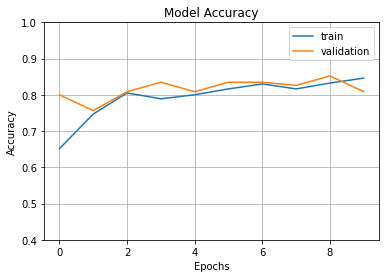

In [14]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

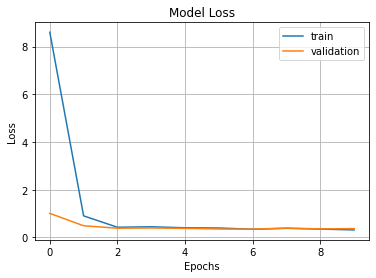

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

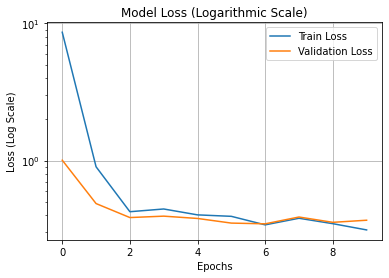

In [16]:
import matplotlib.pyplot as plt

# Plot the loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Add grid, title, labels, and legend
plt.grid()
plt.title('Model Loss (Logarithmic Scale)')
plt.ylabel('Loss (Log Scale)')
plt.xlabel('Epochs')
plt.legend()

# Show the plot
plt.show()


In [17]:
size = (img_height,img_width)
#test_path = '/home/olzhas_ubuntu/Downloads/main_dataset/main_dataset/folder/test'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)
#test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))


Found 231 files belonging to 2 classes.


In [18]:
test_accu = cnn_model.evaluate(test_ds)
print('The testing accuracy is :',test_accu[1]*100, '%')

15/15 [==============================] - 54s 4s/step - loss: 0.3394 - accuracy: 0.8615
The testing accuracy is : 86.14718317985535 %


In [19]:
preds = cnn_model.predict(test_ds,verbose=0)

In [20]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [21]:
decoded_predictions = decode_predictions(preds)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2f})")

NameError: name 'decode_predictions' is not defined

In [ ]:
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0], 
    positive_only = True, 
    num_features =5, 
    hide_rest=False)
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(temp/2+0.5, mask))
plt.show()

In [ ]:
lime_explainer = lime_image.LimeImageExplainer(random_state=42)

# Assuming class_names are defined
for images, labels in test_ds.take(1):
    for i in range(5):
        ax = plt.subplot(4, 4, i + 1)
        
        # Getting the image and converting to uint8
        image = images[i].numpy().astype("uint8")
        
        # Explanation
        explanation = lime_explainer.explain_instance(
            image,
            cnn_model.predict,
            top_labels=1,
            hide_color=0,
            num_samples=1000
        )
        
        plt.imshow(image)
        temp, mask = explanation.get_image_and_mask(
            label=explanation.top_labels[0], 
            positive_only=True, 
            hide_rest=False,
            num_features=5,
            min_weight=0.0
        )
        plt.imshow(mark_boundaries(image, mask))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [ ]:
'''file_paths = test_ds.file_paths
for each in range(0,len(predictions)):
    filenamesish=file_paths[each].split('/')
    print(str(filenamesish[-2])+' '+str(filenamesish[-1])+' '+ str(predictions[each][0]))'''

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels
y_preds= []
# iterate over the dataset
for image_batch, label_batch in test_ds:
    # append true labels
    y_true.append(label_batch)
    # compute predictions
    preds = cnn_model.predict(image_batch)
    
    y_preds.append(preds)
    predictions = preds.copy()
    predictions[predictions <= 0.5] = 0
    predictions[predictions > 0.5] = 1
    y_pred.append(predictions)

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
preds_labels=tf.concat([item for item in y_preds], axis = 0)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(correct_labels, predicted_labels, labels=[0,1]),
    index=["Actual Healthy", "Actual Sick"],
    columns=["Predicted Healthy", "Predicted Sick"])

import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_auc = roc_auc_score(correct_labels, preds_labels)
# summarize scores
print('ResNet50: ROC AUC=%.3f' % (ns_auc))
# calculate roc curves
resnet_fpr, resnet_tpr, _ = roc_curve(correct_labels, preds_labels)
%store -r xc_fpr 
%store -r xc_tpr 

%store -r vgg_fpr 
%store -r vgg_tpr 

%store -r mobilenet_fpr 
%store -r mobilenet_tpr 

%store -r baseline_fpr 
%store -r baseline_tpr 

%store -r vit_fpr 
%store -r vit_tpr

%store -r vit_fpr_better
%store -r vit_tpr_better
# plot the roc curve for the model
pyplot.rcParams['figure.figsize'] = [15, 11]
pyplot.plot(resnet_fpr, resnet_tpr, linestyle='-', label='ResNet50')
#pyplot.plot(xc_fpr, xc_tpr, linestyle='-', label='Xception')
#pyplot.plot(vgg_fpr, vgg_tpr, linestyle='-', label='VGG16')
#pyplot.plot(mobilenet_fpr, mobilenet_tpr, linestyle='-', label='MobileNet')
#p#yplot.plot(baseline_fpr, baseline_tpr, linestyle='--', label='Proposed CNN model')
#py#plot.plot(vit_fpr, vit_tpr, linestyle=':', label='ViT regular')
#pyplot.plot(vit_fpr_better, vit_tpr_better, linestyle='-.', label='ViT with Patch-localization')



# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

tn, fp, fn, tp = confusion_matrix(correct_labels, predicted_labels).ravel()
specificity = tn / (tn+fp)
print('Accuracy: '+ str(accuracy_score(correct_labels, predicted_labels)))
print ('Precision: ' + str(precision_score(correct_labels, predicted_labels)))
print ('Recall/Sensitivity: '+ str(recall_score(correct_labels, predicted_labels)))
print ('Specificity: ',specificity)
print ('F1 score: '+ str(f1_score(correct_labels, predicted_labels)))
#print '\n clasification report:\n', classification_report(y_test,prediction)

In [ ]:
from skimage import io
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [ ]:
from tensorflow.keras.applications.resnet import decode_predictions

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [ ]:
!mkdir -p saved_model
resnet_model.save('saved_model/resnet_model_model')

In [ ]:
new_model = tf.keras.models.load_model('saved_model/resnet_model_model')

# Check its architecture
new_model.summary()


In [ ]:
resnet_model=new_model

In [ ]:
test_accu1 = new_model.evaluate(test_ds)
print('The testing accuracy is :',test_accu1[1]*100, '%')

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
print(resnet_model.input_shape)

In [ ]:
'''model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.resnet50.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions
'''
preprocess_input =  
last_conv_layer_name = "module_wrapper_3"

img_size = (240,240)
# The local path to our target image
img_path = '/home/olzhas_ubuntu/Downloads/main_dataset/main_dataset/test/Sick/6-10_56_42 AM-0007.jpg'

#display(Image(img_path))

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))
tf.image.resize(
    images,
    size,
    method=ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
)

# Remove last layer's softmax
resnet_model.layers[-1].activation = None

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, resnet_model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)
